In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input\iris\Iris.csv
../input\mall-customers\Mall_Customers.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/mall-customers/Mall_Customers.csv')
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
24,25,Female,54,28,14
78,79,Female,23,54,52
47,48,Female,27,40,47
79,80,Female,49,54,42
65,66,Male,18,48,59


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Analysis**
* distribution of data looks fine
* also all the numeric data are in similar ranges

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Multivariate Analysis

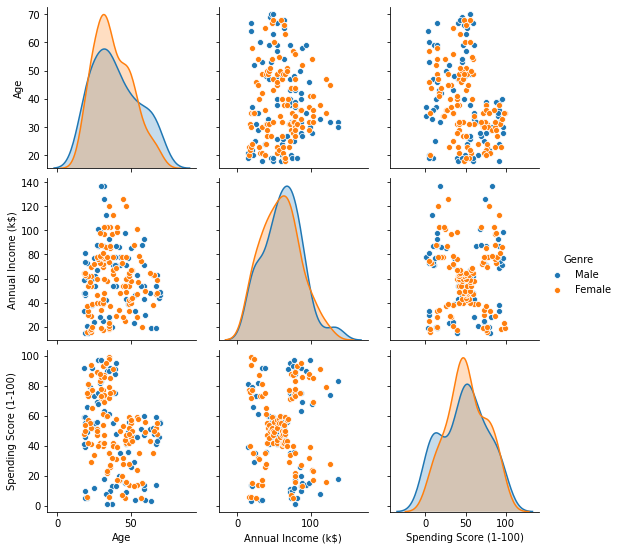

In [7]:
sns.pairplot(df[df.columns.drop('CustomerID')],hue='Genre')
plt.show()

**Analysis**
* from the figure it is clear that genre has very low effect on other vairables
* They are not inter-correlated
* we can obeserve that there are chances forming clusters with 'Annual Income' & 'Spending Score'

# Univariate Analysis

Female    112
Male       88
Name: Genre, dtype: int64


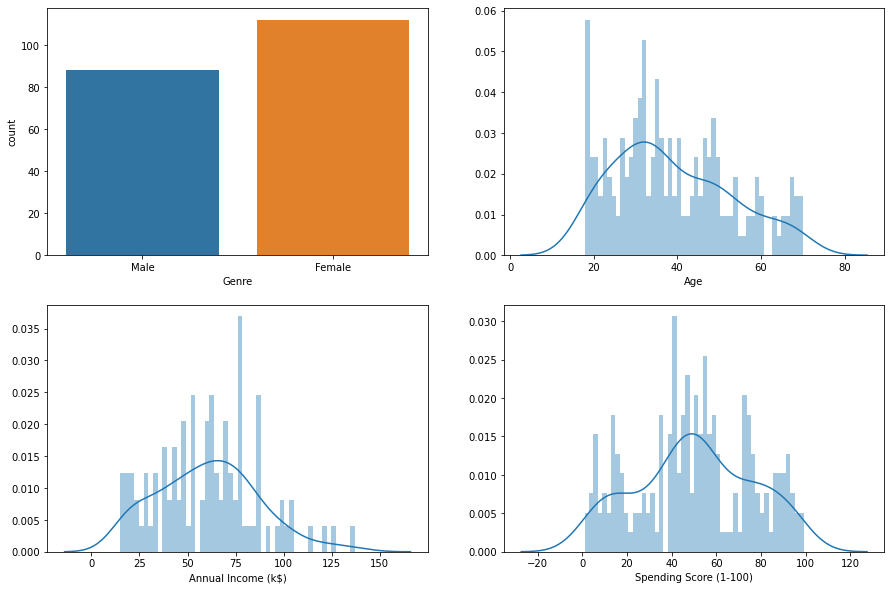

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
print(df['Genre'].value_counts())
sns.countplot(x=df['Genre'],ax = ax[0,0],)
sns.distplot(df['Age'],bins=50,ax=ax[0,1])
sns.distplot(df['Annual Income (k$)'],bins=50,ax=ax[1,0])
sns.distplot(df['Spending Score (1-100)'],bins=50,ax=ax[1,1])
plt.show()

**Analysis**
* the distribution of data is fine no need for tuning

# Bi-Variate Analysis

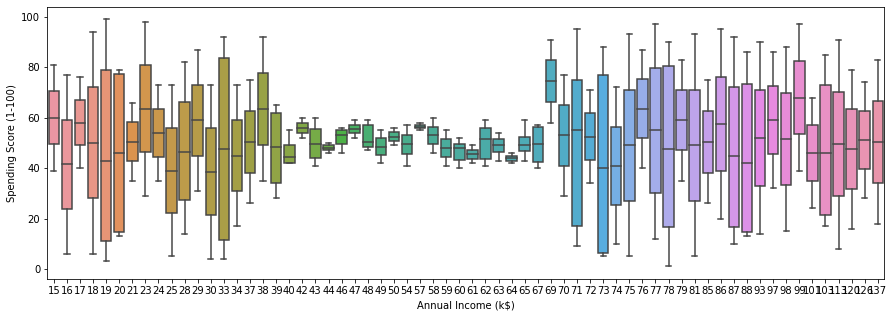

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot('Annual Income (k$)','Spending Score (1-100)',data=df)
plt.show()

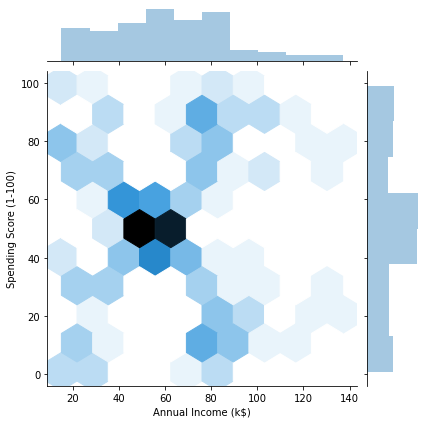

In [10]:
sns.jointplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],kind = 'hex')
plt.show()

**Analysis**
* Center region is most densly populated

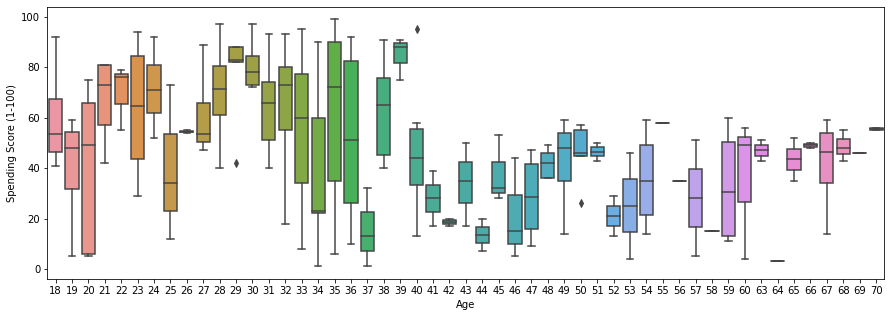

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot('Age','Spending Score (1-100)',data=df)
plt.show()

# Cluster model

In [12]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values

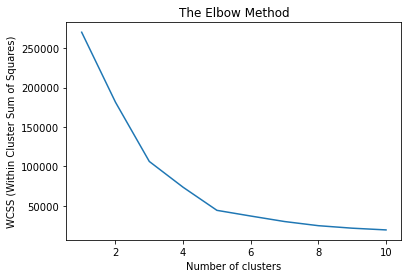

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

**Analysis**
* elbow plot pointing at 5-cluster k-means

In [14]:
# Fitting K-Means to the dataset.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
pred = kmeans.fit_predict(X)

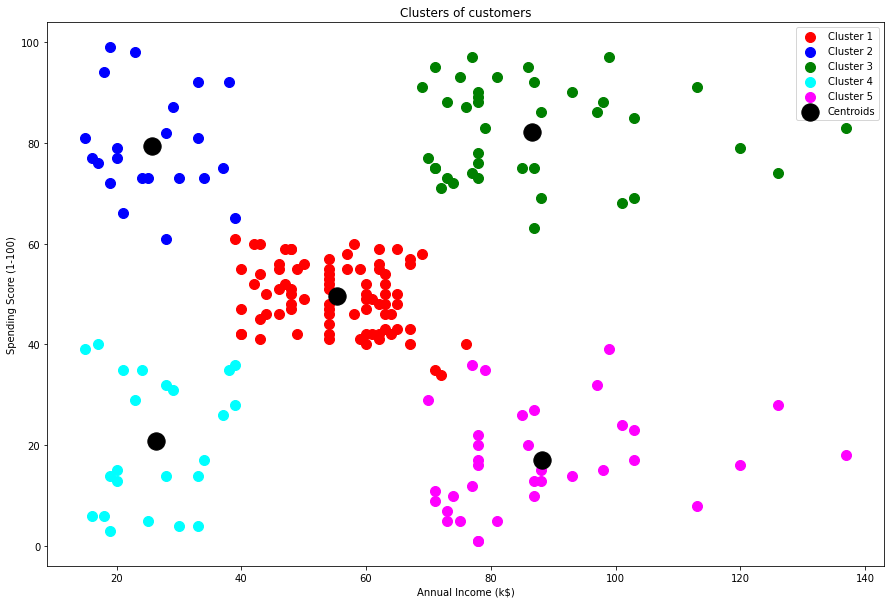

In [15]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()